C:\Users\25759\AppData\Local\Temp\ipykernel_19240\1111699291.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Firm_attr['Product_Code'] = firm_product


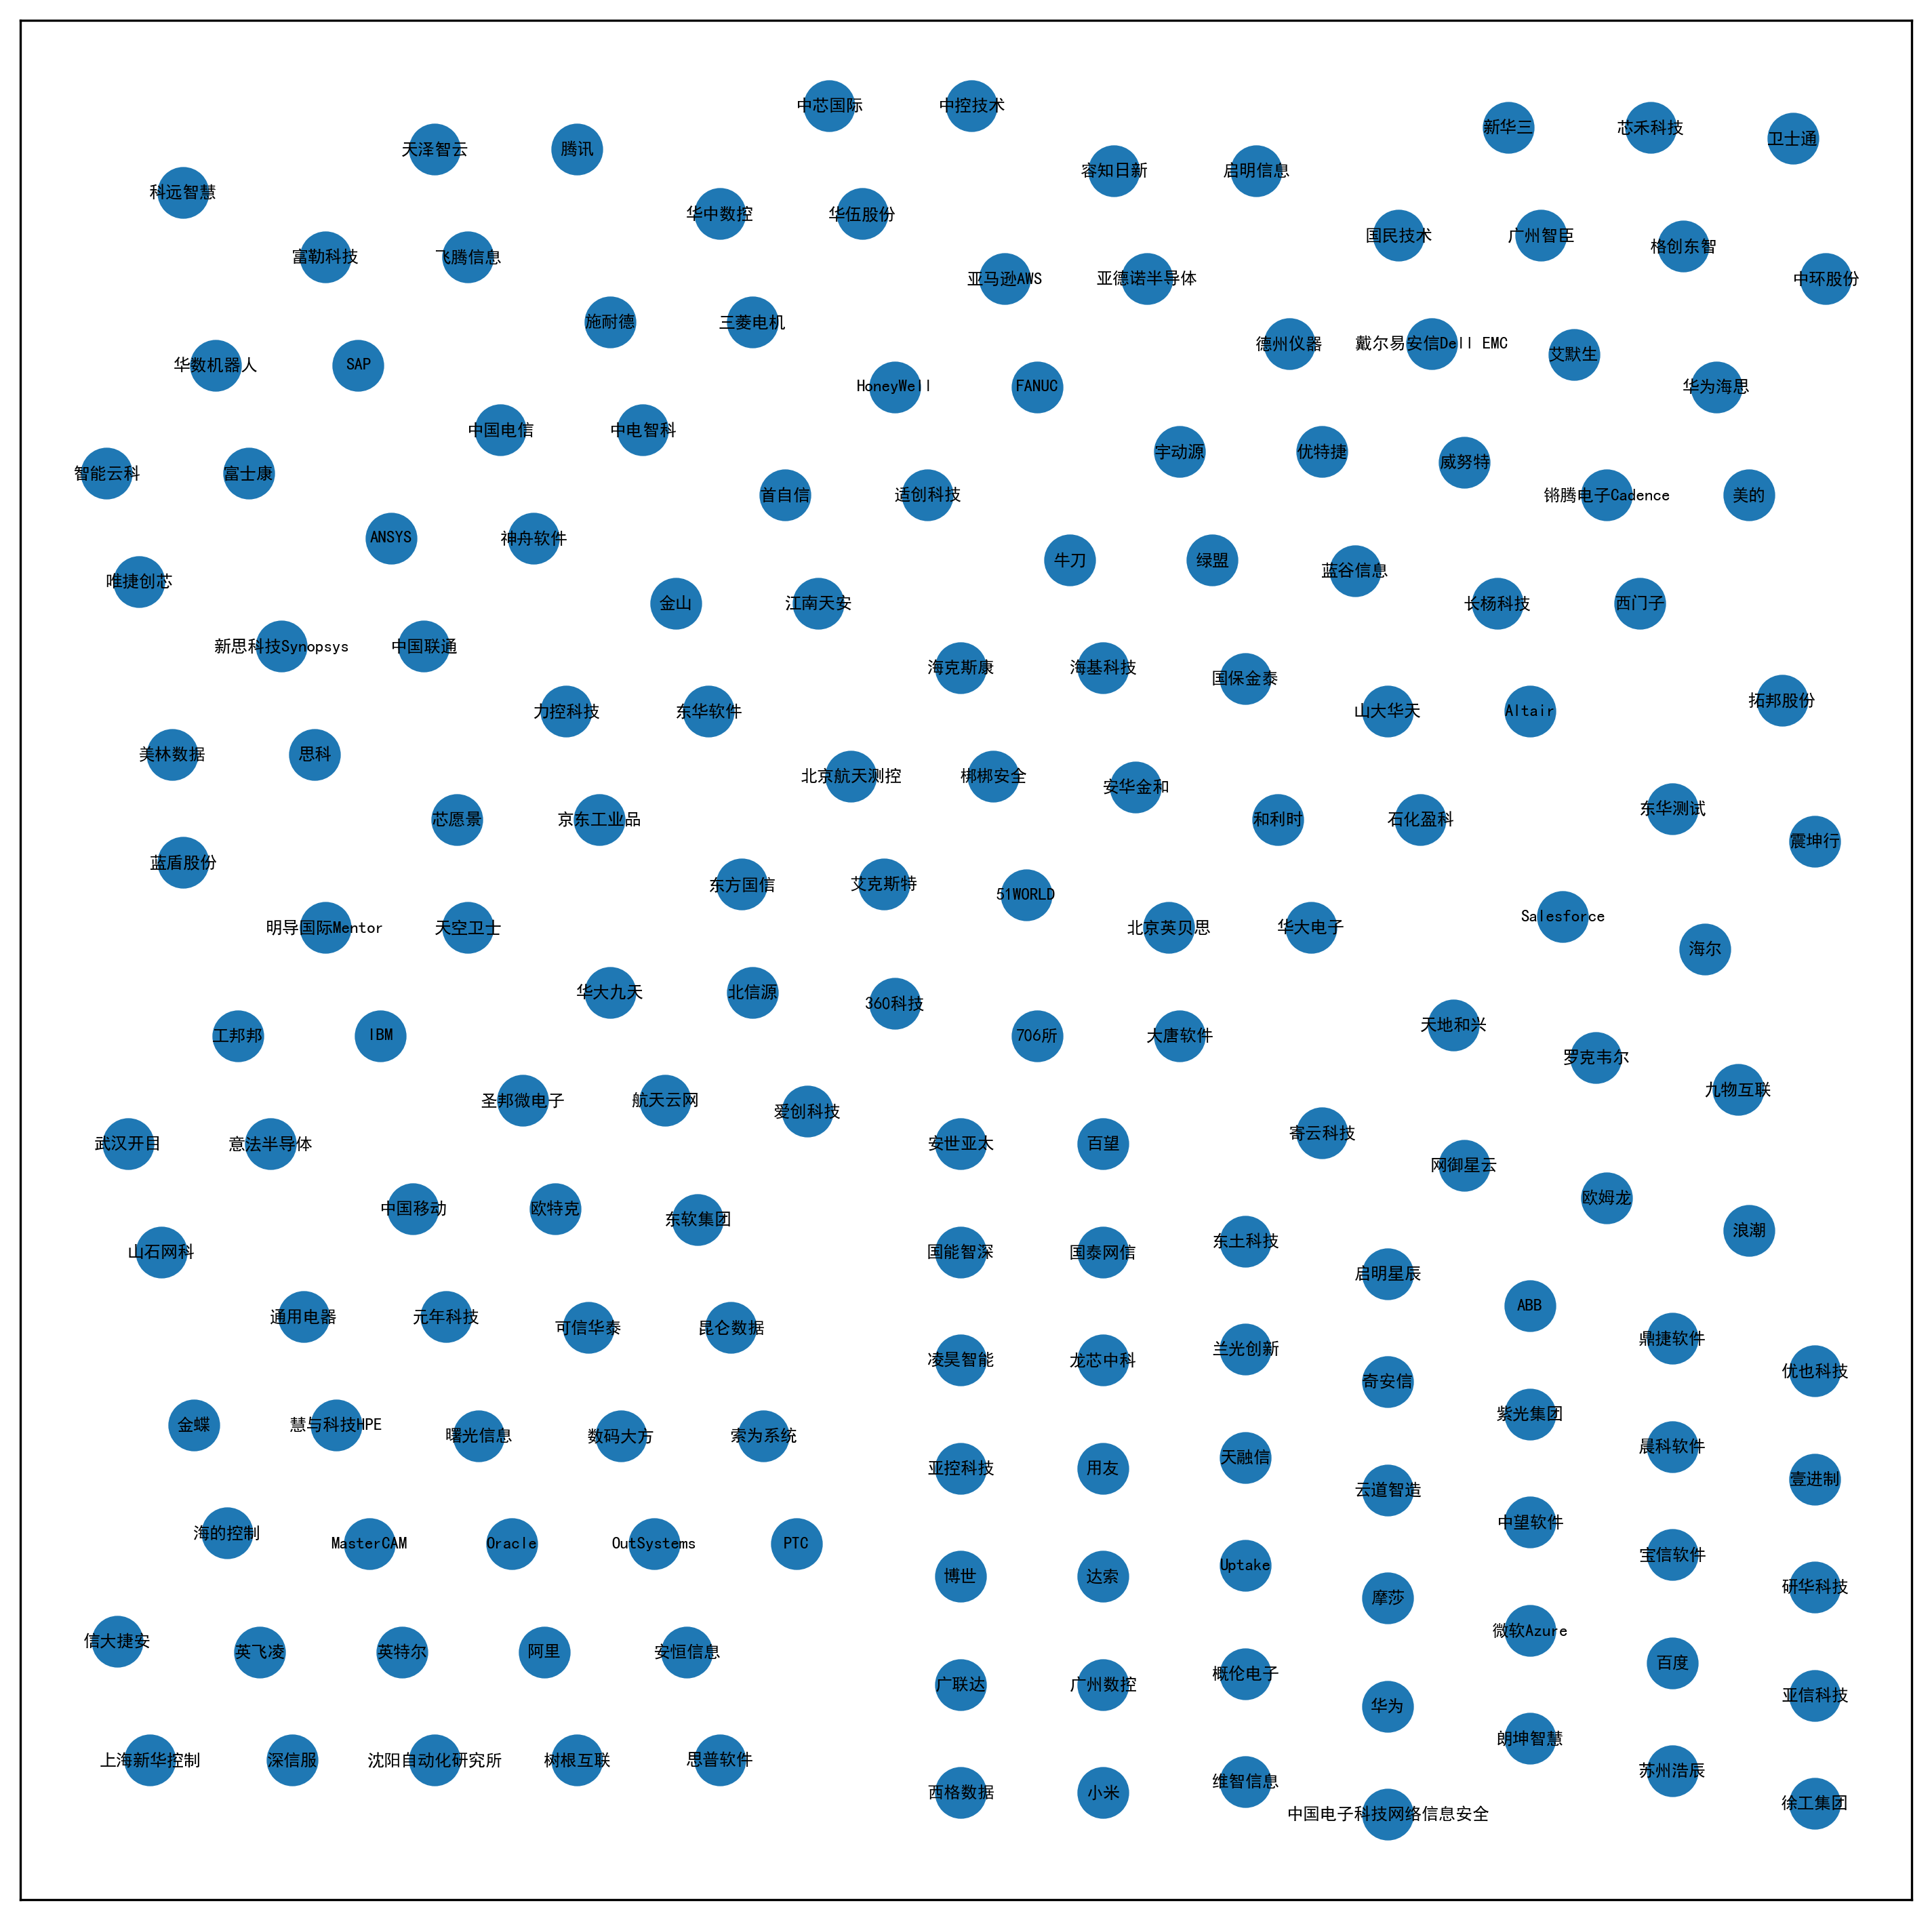

In [78]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = 'SimHei'

Firm = pd.read_csv("Firm.csv")
Firm.fillna(0, inplace=True)
Firm_attr = Firm[["Code","Name","Type_Region"]]
firm_product = []
for _, row in Firm.loc[:,'1':].iterrows():
    firm_product.append(row[row==1].index.to_list())
Firm_attr['Product_Code'] = firm_product
Firm_attr.set_index('Code')

G =nx.MultiDiGraph()
G.add_nodes_from(Firm["Code"])

labels_dict = {}
for code in G.nodes:
    labels_dict[code] = Firm_attr.loc[code].to_dict()
nx.set_node_attributes(G, labels_dict)

pos = nx.nx_agraph.graphviz_layout(G, prog="twopi", args="")
node_labels = nx.get_node_attributes(G, 'Name')
plt.figure(figsize=(12, 12), dpi=300)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels = node_labels, font_size=6)
plt.show()